This notebook is intended to show a simple way to get to a graph of appliance ownership and access type.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from drs_sentani import get_survey
survey = get_survey()
import pysentani as sti

Grab the access type.  Make a smaller dataframe with only the columns we care about.

In [2]:
survey['access_type'] = sti.access_type(survey)
subsurvey = survey[['access_type',
                   'app_now/radio',
                   'app_now/TV']]

Use a groupby operation and a mean to get the percentage of households reporting ownership by access type.  This is exactly the information we want in a compact form.

In [3]:
analyzed = subsurvey.groupby('access_type').mean()
analyzed

,app_now/radio,app_now/TV
access_type,,
PLN_grid,0.301056,0.815141
PLN_microgrid,0.278481,0.810127
community_microgrid,0.500000,0.923077
no_access,0.431907,0.797665


To graph this in seaborn, we want to transform from wide format to long format.  The following code does that.  

In [4]:
analyzed['access_type'] = analyzed.index  # is there a way to avoid this?  seems unnecessary.
melted = pd.melt(analyzed, 
                 id_vars=['access_type'],
                 value_vars=['app_now/radio', 'app_now/TV'],
                 value_name='Percent Ownership')
melted

,access_type,variable,Percent Ownership
0,PLN_grid,app_now/radio,0.301056
1,PLN_microgrid,app_now/radio,0.278481
2,community_microgrid,app_now/radio,0.500000
3,no_access,app_now/radio,0.431907
4,PLN_grid,app_now/TV,0.815141
5,PLN_microgrid,app_now/TV,0.810127
6,community_microgrid,app_now/TV,0.923077
7,no_access,app_now/TV,0.797665


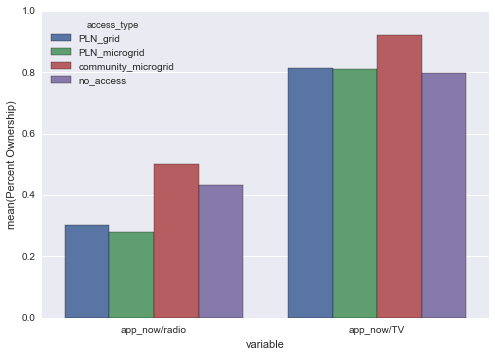

In [5]:
sns.barplot(x='variable', y='Percent Ownership', hue='access_type', data=melted)

There is some work do be done to make the labels nicer, but I think this makes the overall intent and implementation of the calculation more clear.